# Classification MNIST et AdamOptimizer

In [1]:
cd ../src

c:\Users\fredl\Documents\Cours\M1 Androide\S2\ML\Projet\src


C:\Users\fredl\AppData\Roaming\Python\Python313\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from activation_func import *
from loss import *
from mltools import *
from module import *
from optimizers import *
from mltools import *
import torch
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

input_dim, hidden_dim, output_dim = 784, 128, 10
epochs = 10
lr = 1e-4
loss_fn = CrossEntropyLoss()

100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


Test Accuracy: 82.44%


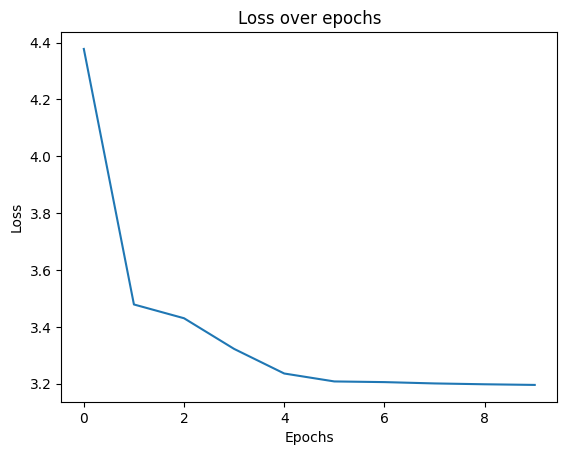

In [5]:
network = Sequential(
    Linear(input_dim, hidden_dim),
    TanH(),
    Linear(hidden_dim, output_dim),
    LogSoftmax()
)

optimizer = Optim(network, loss_fn, lr)
data_x, data_y = [], []
for images, labels in train_loader:
    images = images.view(-1, 28 * 28).numpy()
    labels = np.eye(output_dim)[labels.numpy()]
    data_x.append(images)
    data_y.append(labels)
data_x = np.vstack(data_x)
data_y = np.vstack(data_y)
losses = optimizer.SGD(data_x, data_y, batch_size=64, num_iterations=epochs)

correct, total = 0, 0
for images, labels in test_loader:
    images = images.view(-1, 28 * 28).numpy()
    labels = labels.numpy()

    outputs = network.forward(images)
    predictions = np.argmax(outputs, axis=1)
    correct += (predictions == labels).sum()
    total += labels.size

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Adam Optimizer

100%|██████████| 10/10 [00:34<00:00,  3.45s/it]


Test Accuracy: 93.02%


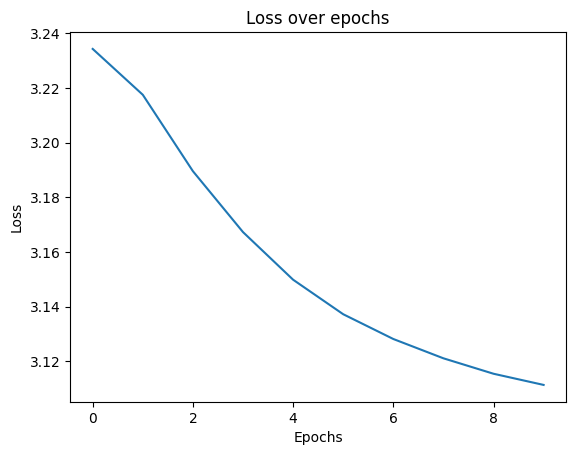

In [4]:
network = Sequential(
    Linear(input_dim, hidden_dim),
    TanH(),
    Linear(hidden_dim, output_dim),
    LogSoftmax()
)

optimizer = AdamOptimizer(network, loss_fn, lr)
data_x, data_y = [], []
for images, labels in train_loader:
    images = images.view(-1, 28 * 28).numpy()
    labels = np.eye(output_dim)[labels.numpy()]
    data_x.append(images)
    data_y.append(labels)
data_x = np.vstack(data_x)
data_y = np.vstack(data_y)
losses = optimizer.SGD(data_x, data_y, batch_size=64, num_iterations=epochs)

correct, total = 0, 0
for images, labels in test_loader:
    images = images.view(-1, 28 * 28).numpy()
    labels = labels.numpy()

    outputs = network.forward(images)
    predictions = np.argmax(outputs, axis=1)
    correct += (predictions == labels).sum()
    total += labels.size

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()